<a href="https://colab.research.google.com/github/saadkhan10123/DLL-internship/blob/main/House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [ ]:
import pandas as pd

def load_data():
    data = pd.read_csv("data.txt", delimiter=",")
    X = data.iloc[:, :5].drop(data.columns[2], axis=1).values  # Select all rows of the first column
    y = data.iloc[:, 5].values  # Select all rows of the sixth column
    return X, y

In [ ]:
X_train, y_train = load_data()

# print x_train
print("Type of x_train:",type(X_train))
print("First five elements of x_train are:\n", X_train[:5])

# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[ 7 99  9  1]
 [ 4 82  4  2]
 [ 8 51  7  2]
 [ 5 52  5  2]
 [ 7 75  8  5]]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [91. 65. 45. 36. 66.]


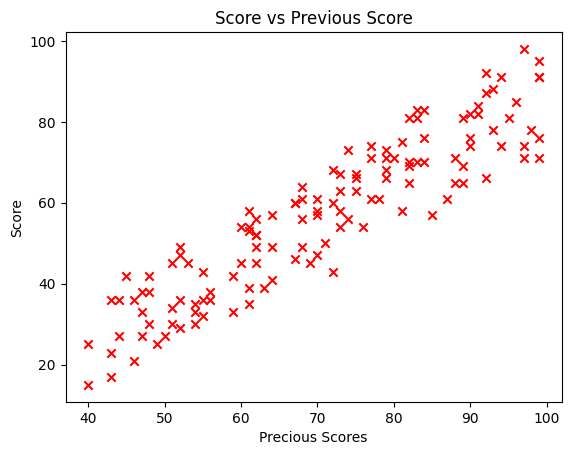

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Score vs Previous Score")
# Set the y-axis label
plt.ylabel('Score')
# Set the x-axis label
plt.xlabel('Precious Scores')
plt.show()

In [ ]:
def compute_cost(X, y, w, b):
  m = X.shape[0]

  h = np.dot(X, w) + b - y
  total_cost = np.sum(h ** 2) / (2 * m)

  return total_cost

In [ ]:
def compute_gradient(X, y, w, b):
  m = X.shape[0]

  df_dw = 0
  df_db = 0

  h = np.dot(X, w) + b - y
  df_dw = np.dot(X.T, h) / m
  df_db = np.sum(h) / m

  return df_dw, df_db

In [ ]:
def gradient_decent(X, y, w_in, b_in, alpha, num_iters):
  w = w_in
  b = b_in

  for i in range(num_iters):
    df_dw, df_db = compute_gradient(X, y, w, b)
    # Update parameters
    w = w - alpha * df_dw
    b = b - alpha * df_db

    if i % 1000 == 0:
      print(f"The cost after {i} iterations is {compute_cost(X, y, w, b)}")

  return w, b

In [ ]:
fin_w, fin_b = gradient_decent(X_train, y_train, np.array([1, 1, 1, 1]), 0, 3e-4, 10000)

print(f"The w found is {fin_w}, and the b is {fin_b}")

The cost after 0 iterations is 194.96607038738577
The cost after 1000 iterations is 17.110484716211467
The cost after 2000 iterations is 16.142820790871124
The cost after 3000 iterations is 15.889322747485172
The cost after 4000 iterations is 15.673530228178505
The cost after 5000 iterations is 15.462766852296395
The cost after 6000 iterations is 15.255277360061513
The cost after 7000 iterations is 15.050923588015053
The cost after 8000 iterations is 14.849653522229174
The cost after 9000 iterations is 14.651420384503052
The w found is [ 2.29924257  0.81063941 -1.20439269 -0.31690848], and the b is -2.629040449618503


In [ ]:
def predict(w, X, b):
  return (np.dot(w, X) + b)

Text(0.5, 0, 'Population of City in 10,000s')

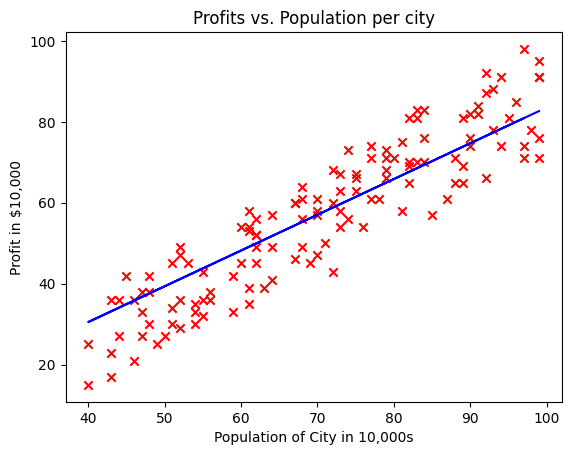

In [ ]:
# Plot the linear fit
plt.plot(X_train, predict(fin_w, X_train, fin_b), c = "b")

# Create a scatter plot of the data.
plt.scatter(X_train, y_train, marker='x', c='r')

# Set the title
plt.title("Previous Score vs Score")
# Set the y-axis label
plt.ylabel('Score')
# Set the x-axis label
plt.xlabel('Previous Score')